# Bibliotecas

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
import shap

import warnings

# Carregamento dos Dados

In [2]:
# Importando o dataset
df = pd.read_csv('C:/Users/bruno/OneDrive/Desktop/AnalisePreditivaUTI/data/dataUTI_tratado.csv', sep=';', encoding='utf-8')

In [3]:
# Exibir amostra do dataset
df.head()

,ID Registro,Idade,Data de Internação CTI,IMC,Linha de Cuidado,HIV,Tuberculose,AIDS,Frequência Cardíaca,Frequência Respiratória,Creatinina,Leucócitos,pH,Contagem de Plaquetas,Score Respiratório,Bilirrubina,Desfecho UTI,Saída UTI,Tempo na UTI
0,3,45.0,2023-03-29,26.64,DFA,Unchecked,Unchecked,Unchecked,113,27,4.9,28.2,7.33,17.0,3.0,6.80,Transferência inter-hospitalar para outra Enfe...,2023-04-13,15.0
1,5,45.0,2023-04-05,20.76,Tuberculose,Unchecked,Checked,Unchecked,114,16,0.9,14.2,7.40,352.0,1.0,0.40,Óbito na UTI,2023-04-05,0.0
2,8,45.0,2023-04-10,19.81,HIV Resp.,Checked,Unchecked,Checked,177,35,0.6,14.4,7.18,413.0,3.0,0.50,Óbito na UTI,2023-04-11,1.0
3,9,45.0,2023-03-19,28.96,SRAG,Unchecked,Unchecked,Unchecked,40,20,3.8,15.0,7.18,190.0,0.0,0.08,Óbito na UTI,2023-04-11,23.0
4,10,45.0,2023-04-08,20.70,Tuberculose,Unchecked,Checked,Unchecked,143,34,1.5,12.1,7.09,361.0,3.0,0.10,Óbito na UTI,2023-04-09,1.0


In [4]:
# Análise de linhas e colunas
df.shape

(361, 19)

In [5]:
# Análise descritiva do dataset
df.describe()

,ID Registro,Idade,IMC,Frequência Cardíaca,Frequência Respiratória,Creatinina,Leucócitos,pH,Contagem de Plaquetas,Score Respiratório,Bilirrubina,Tempo na UTI
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,221.603878,46.091413,20.472188,104.659280,25.487535,1.693795,10.562188,7.366648,228.161773,1.069252,1.089557,13.343490
std,133.282807,16.714430,5.994071,30.132167,6.880769,1.792332,6.750426,0.119968,148.110802,1.205622,3.196038,16.139445
min,3.000000,0.000000,9.130000,37.000000,7.000000,0.200000,0.300000,6.900000,2.000000,0.000000,0.030000,0.000000
25%,106.000000,33.000000,16.650000,85.000000,20.000000,0.770000,5.500000,7.330000,117.000000,0.000000,0.200000,4.000000
50%,202.000000,45.000000,19.720000,110.000000,25.000000,1.000000,9.500000,7.400000,200.000000,1.000000,0.400000,8.000000
75%,350.000000,58.000000,23.680000,127.000000,30.000000,1.710000,14.000000,7.430000,326.000000,2.000000,0.750000,17.000000
max,454.000000,92.000000,62.500000,177.000000,47.000000,12.000000,41.900000,7.930000,769.000000,4.000000,45.000000,131.000000


# Transformação de variáveis categóricas em numéricas

In [6]:
# Cópia do dataframe para transformar os dados
df2 = pd.DataFrame.copy(df)

In [7]:
# Ignorar avisos de warning
warnings.filterwarnings("ignore")

In [8]:
# Transformação de variáveis categóricas
df2['Linha de Cuidado'].replace({'DFA': 0, 'Chagas ICC': 1, 'HIV (outros)': 2, 'HIV Neuro': 3, 'HIV Resp.': 4, 'HTLV': 5, 'Monkeypox': 6, 'SRAG': 7, 'Tuberculose': 8, 'Outros': 9}, inplace=True)
df2['HIV'].replace({'Unchecked': 0, 'Checked': 1}, inplace=True)
df2['Tuberculose'].replace({'Unchecked': 0, 'Checked': 1}, inplace=True)
df2['AIDS'].replace({'Unchecked': 0, 'Checked': 1}, inplace=True)
df2['Desfecho UTI'] = np.where(df2['Desfecho UTI'] == 'Óbito na UTI', 0, 1)

Linha de Cuidado = DFA (0), Chagas ICC (1), HIV (outros) (2), HIV Neuro (3), HIV Resp. (4), HTLV (5), Monkeypox (6), SRAG (7), Tuberculose (8), Outros (9)

HIV = Unchecked (0), Checked (1)

Tuberculose = Unchecked (0), Checked (1)

AIDS = Unchecked (0), Checked (1)

Desfecho UTI = Óbito na UTI (0), Outros (1)

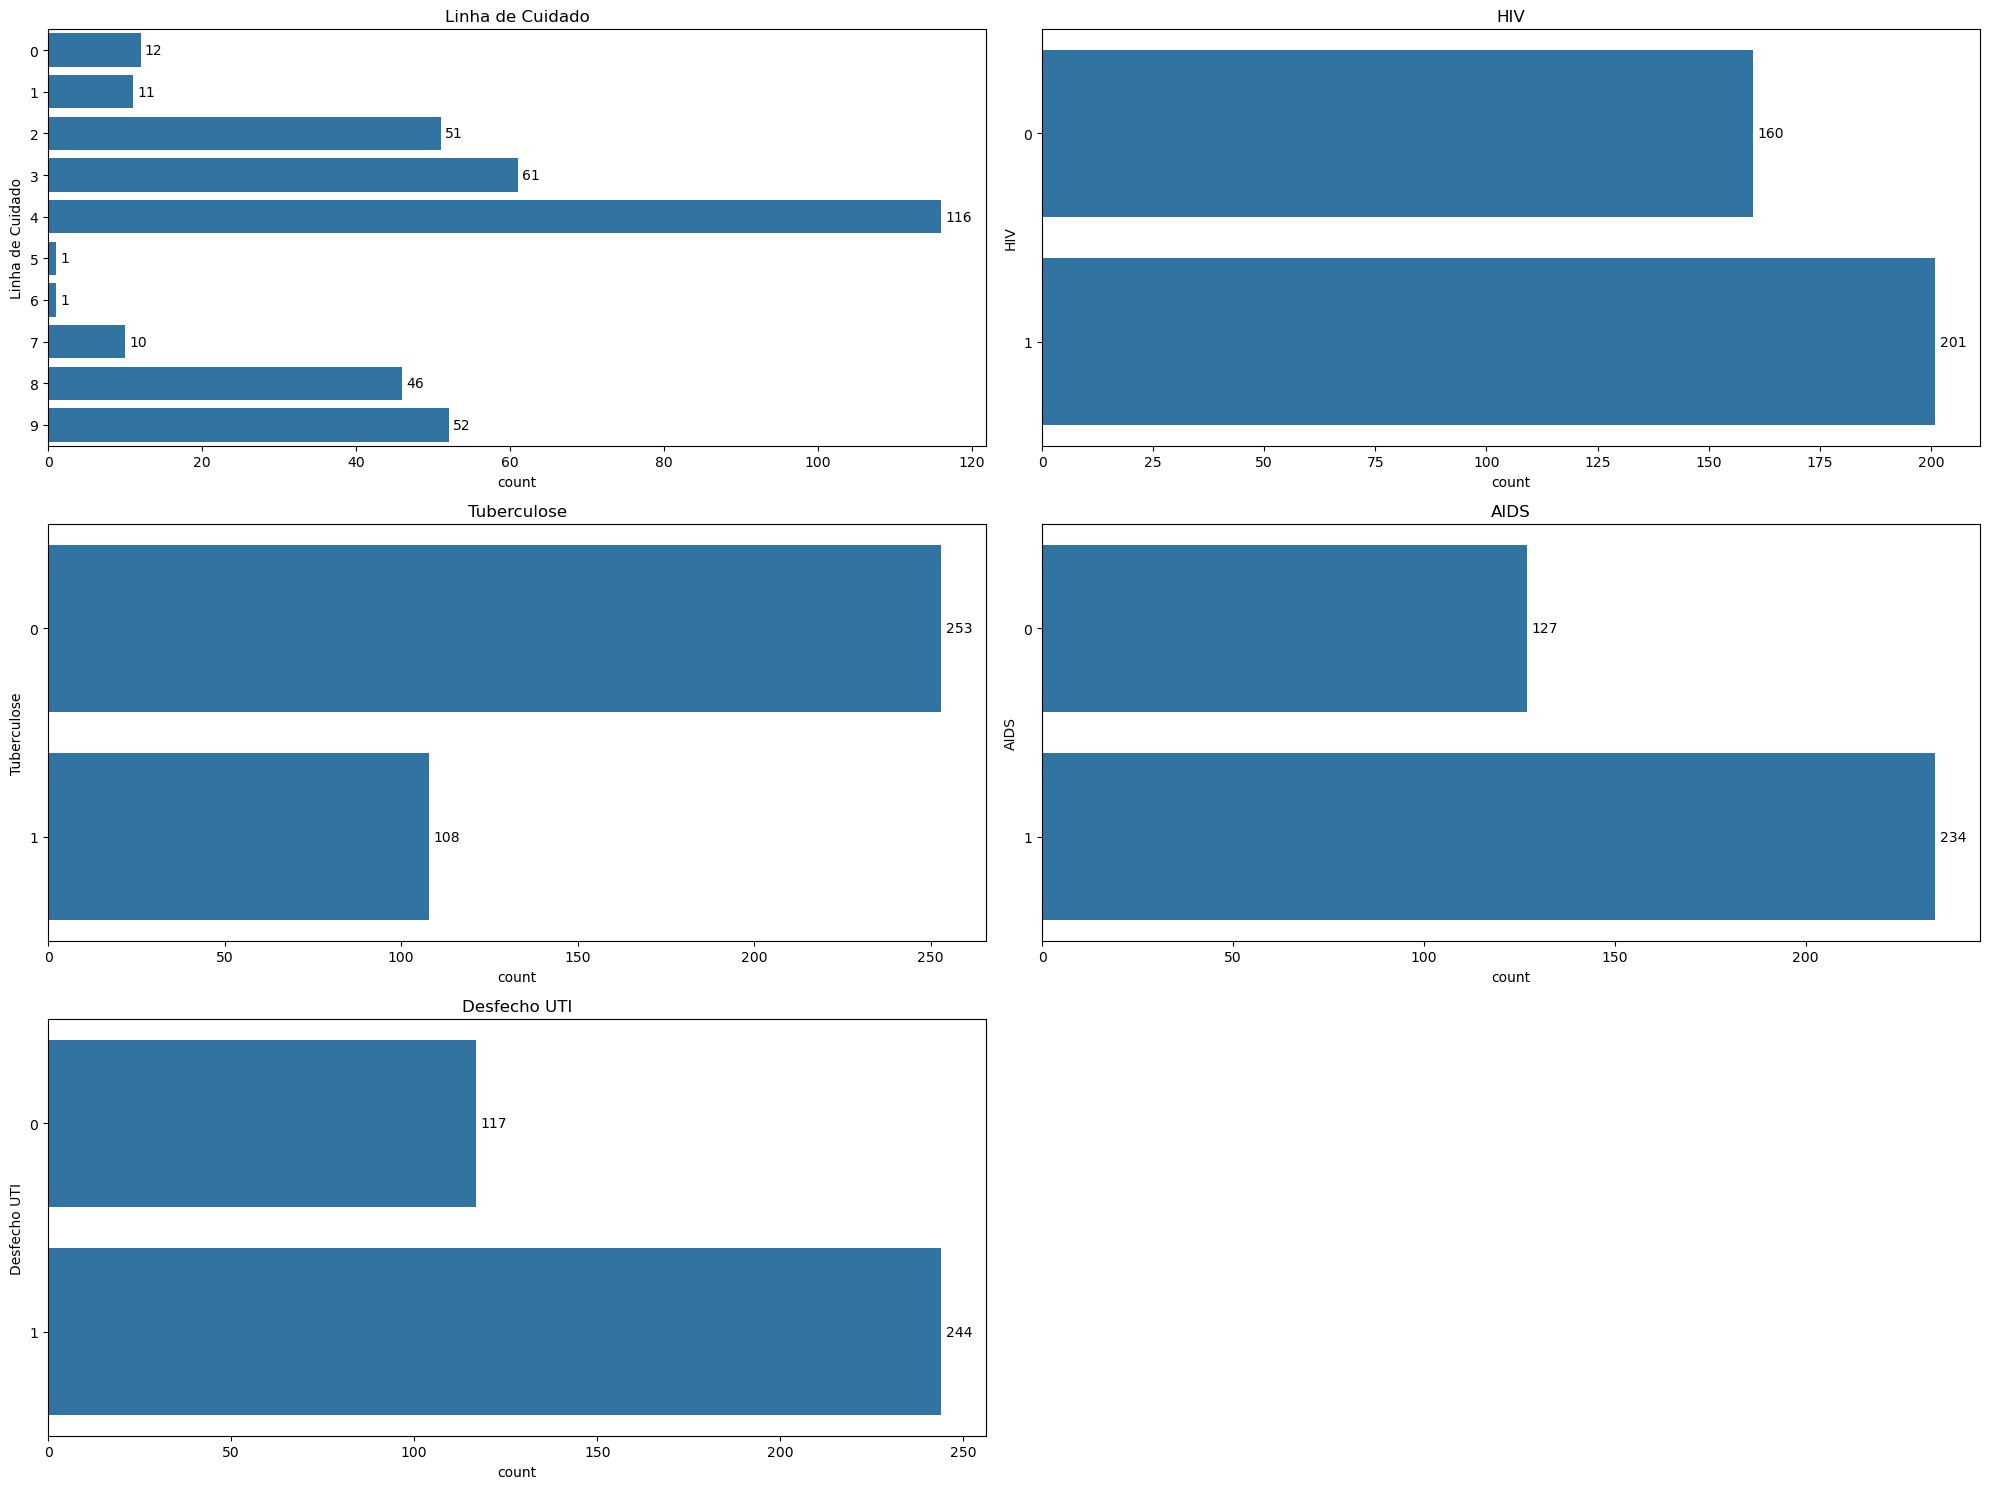

In [9]:
# Grid de variáveis transformadas
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

sns.countplot(ax=axes[0, 0], y='Linha de Cuidado', data=df2)
axes[0, 0].set_title('Linha de Cuidado')
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, label_type='edge', fontsize=10, padding=3)

sns.countplot(ax=axes[0, 1], y='HIV', data=df2)
axes[0, 1].set_title('HIV')
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, label_type='edge', fontsize=10, padding=3)

sns.countplot(ax=axes[1, 0], y='Tuberculose', data=df2)
axes[1, 0].set_title('Tuberculose')
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, label_type='edge', fontsize=10, padding=3)

sns.countplot(ax=axes[1, 1], y='AIDS', data=df2)
axes[1, 1].set_title('AIDS')
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, label_type='edge', fontsize=10, padding=3)

sns.countplot(ax=axes[2, 0], y='Desfecho UTI', data=df2)
axes[2, 0].set_title('Desfecho UTI')
for container in axes[2, 0].containers:
    axes[2, 0].bar_label(container, label_type='edge', fontsize=10, padding=3)

# Remover o eixo vazio
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

In [10]:
# Análise dos tipos de variáveis
df2.dtypes

ID Registro                  int64
Idade                      float64
Data de Internação CTI      object
IMC                        float64
Linha de Cuidado             int64
HIV                          int64
Tuberculose                  int64
AIDS                         int64
Frequência Cardíaca          int64
Frequência Respiratória      int64
Creatinina                 float64
Leucócitos                 float64
pH                         float64
Contagem de Plaquetas      float64
Score Respiratório         float64
Bilirrubina                float64
Desfecho UTI                 int32
Saída UTI                   object
Tempo na UTI               float64
dtype: object

# Atributos previsores e alvo

In [11]:
# Separando atributos previsores e removendo coluna de data da internação
previsores = np.delete(df2.iloc[:, 1:16].values, 1, axis=1)
previsores

array([[45.0, 26.64, 0, ..., 17.0, 3.0, 6.8],
       [45.0, 20.76, 8, ..., 352.0, 1.0, 0.4],
       [45.0, 19.81, 4, ..., 413.0, 3.0, 0.5],
       ...,
       [35.0, 17.85, 8, ..., 398.0, 0.0, 0.8],
       [46.0, 16.16, 4, ..., 209.0, 3.0, 1.0],
       [70.0, 30.99, 9, ..., 509.0, 2.0, 1.87]], dtype=object)

In [12]:
# Análise de linhas e colunas
previsores.shape

(361, 14)

In [13]:
# Separando atributo alvo
alvo = df2.iloc[:, 16].values
alvo

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,

# Escalonamento

In [14]:
# Normalizando os dados
scaler = StandardScaler()

# Aplicação da normalização nos atributos previsores
previsores_esc = scaler.fit_transform(previsores)

# OneHotEnconder

In [15]:
# Aplicando o OneHotEncoder na variável categórica ordinal para 
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' para evitar multicolinearidade

# Selecionando a coluna "Linha de Cuidado"
linha_cuidado_encoded = encoder.fit_transform(previsores_esc[:, 2].reshape(-1, 1))  

# Removendo a coluna original e concatenando com as novas colunas codificadas
previsores_final = np.concatenate((previsores_esc[:, :2], linha_cuidado_encoded, previsores_esc[:, 3:]), axis=1)

# SMOTE

In [16]:
# Ignorar avisos de warning
warnings.filterwarnings("ignore")

# Aplicando SMOTE para balanceamento de classes
smote = SMOTE(sampling_strategy='auto', random_state=5)
x_resampled, y_resampled = smote.fit_resample(previsores_final, alvo)

  File "C:\Users\bruno\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\bruno\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bruno\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\bruno\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


# Treinamento do modelo e melhor seleção

In [17]:
# Dividir os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=5)

In [18]:
# Seleção do modelo de teste
modelo = {
    'Logistic Regression': LogisticRegression()
}

# Definição de parâmetros
parametros = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga', 'newton-cholesky', 'sag'],
        'max_iter': [100, 200, 500, 1000],
        'tol': [0.0001],
        'class_weight': ['balanced', None],
    }
}

In [19]:
melhor_modelo = None
melhor_score = 0

for nome_modelo, modelo in modelo.items():
    clf = GridSearchCV(modelo, parametros[nome_modelo], cv=5)
    clf.fit(x_train, y_train)
    score = clf.best_score_
    print(f"{nome_modelo}: {score}")

    if score > melhor_score:
        melhor_modelo = clf.best_estimator_
        melhor_score = score

# Definição do melhor modelo
print("Melhor modelo:", melhor_modelo.get_params())

Logistic Regression: 0.676923076923077
Melhor modelo: {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


# Avaliação do Modelo

In [20]:
# Análise do modelo com as previsões nos dados de teste
y_pred = melhor_modelo.predict(x_test)
resul = classification_report(y_test, y_pred)
print(resul)

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        48
           1       0.68      0.68      0.68        50

    accuracy                           0.67        98
   macro avg       0.67      0.67      0.67        98
weighted avg       0.67      0.67      0.67        98



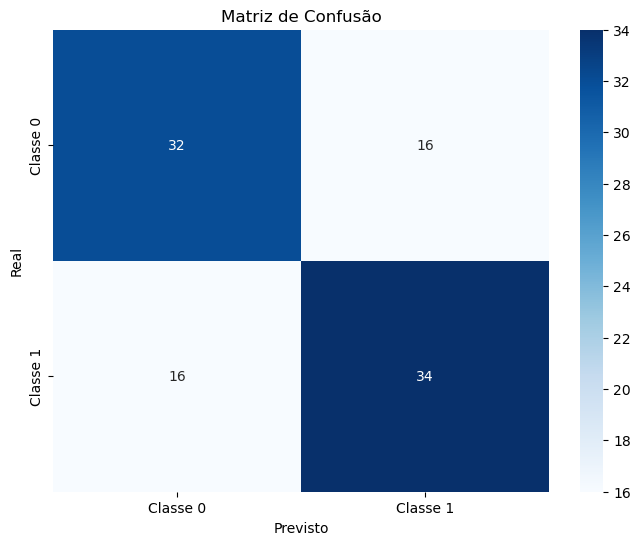

In [21]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Heatmap da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Classe 0', 'Classe 1'], 
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [22]:
df = pd.DataFrame(previsores_final)
features = df.columns

         Current function value: 0.494383
         Iterations: 35


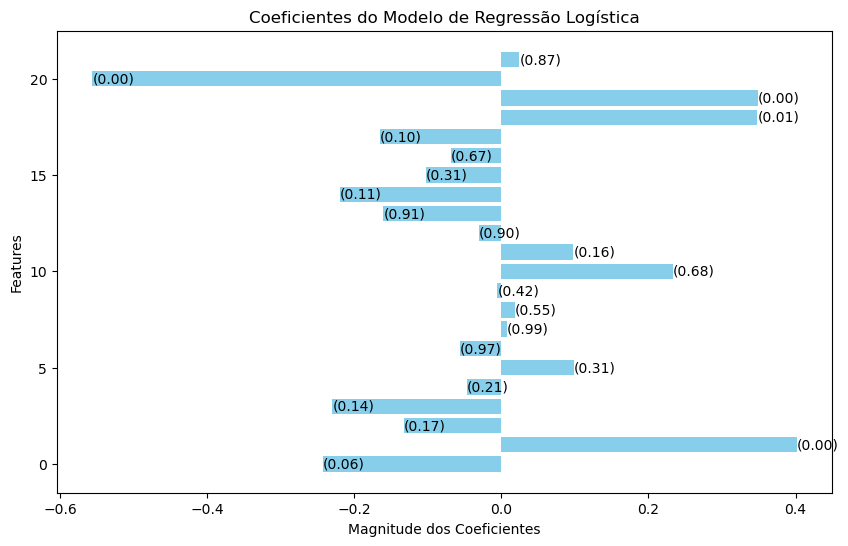

In [23]:
clf = GridSearchCV(LogisticRegression(), parametros['Logistic Regression'], cv = 5)
clf.fit(previsores_final, alvo)

best_model = clf.best_estimator_
best_score = clf.best_score_

coeficientes = best_model.coef_[0]

# Ajustando o modelo de regressão logística com statsmodels para calcular os p-values
log_reg_sm = sm.Logit(alvo, sm.add_constant(previsores_final))
result = log_reg_sm.fit()
p_values = result.pvalues[1:]

# Criando um gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(features, coeficientes, color='skyblue')

# Adicionando significância estatística aos coeficientes
for i, (coef, p_value) in enumerate(zip(coeficientes, p_values)):
    ax.text(coef, i, f'({p_value:.2f})', va='center')

ax.set_xlabel('Magnitude dos Coeficientes')
ax.set_ylabel('Features')
ax.set_title('Coeficientes do Modelo de Regressão Logística')
plt.show()

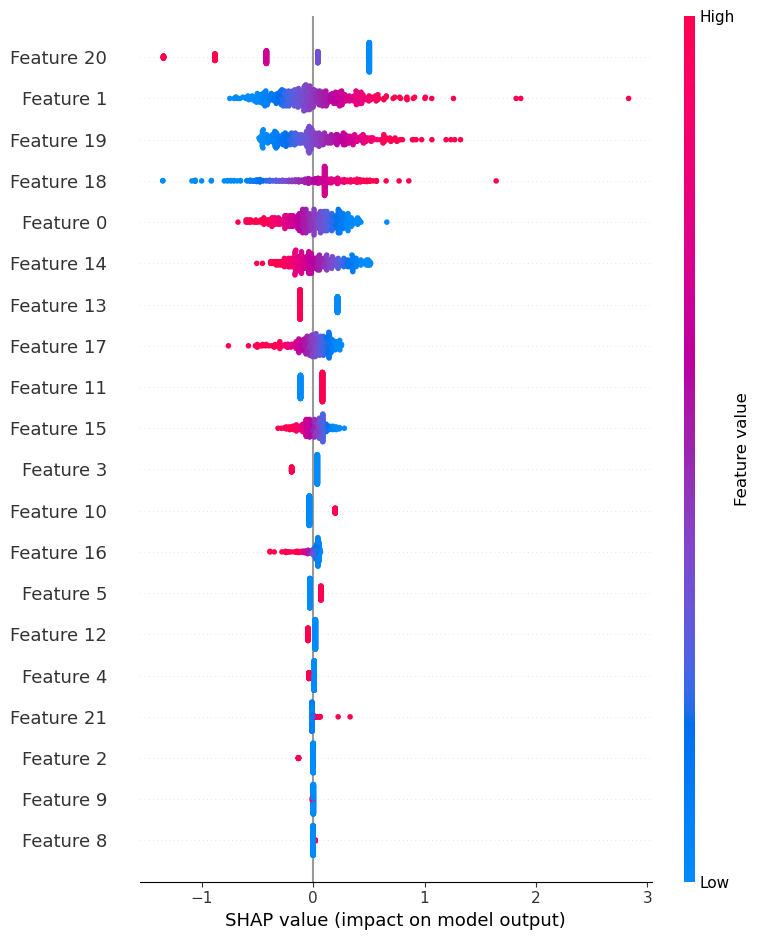

In [24]:
# Plotando o gráfico de explainer
explainer = shap.Explainer(best_model, previsores_final)
shap_values = explainer(previsores_final)

shap.summary_plot(shap_values, previsores_final)

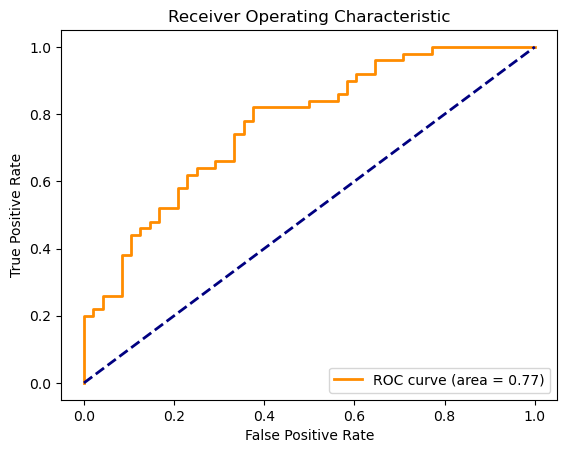

In [25]:
# Plotando a curva ROC
y_pred_proba = melhor_modelo.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

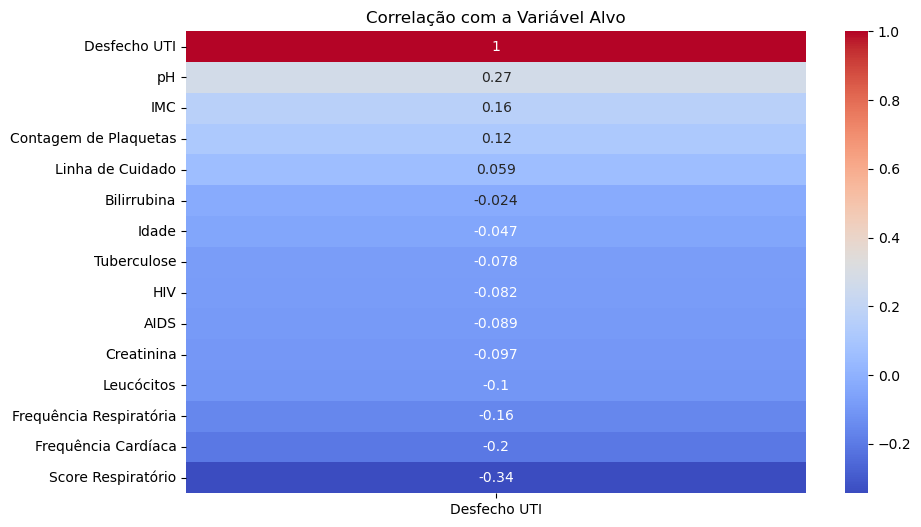

In [26]:
# Removendo colunas não numéricas
df_corr = df2.drop(columns=['ID Registro','Data de Internação CTI', 'Saída UTI', 'Tempo na UTI']).copy()
df_corr['Desfecho UTI'] = alvo

# Calculando a matriz de correlação
corr = df_corr.corr()

# Plotando a correlação com a variável alvo
plt.figure(figsize=(10, 6))
sns.heatmap(corr[['Desfecho UTI']].sort_values(by='Desfecho UTI', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlação com a Variável Alvo')
plt.show()